# Text Mining of Yelp Reviews


### Import the necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score,confusion_matrix

### Look at the distribution of the ratings (good vs. bad)

In [2]:
df = pd.read_csv('yelp-data-lab5.csv')
print(df.head())

   user_id  prod_id rating  label      date  \
0    60609     3611    bad      1   7/12/13   
1   121342     3528    bad      1    7/7/12   
2   102327     1378    bad     -1  11/17/12   
3   108938     4037    bad      1   1/28/13   
4    66638     2645    bad     -1   12/3/13   

                                              review  Year           venue  
0  horrible. I went there for a nice fresh lobste...  2013     Don Pepe II  
1  This might be ok for a beer, but don't dare tr...  2012  Rattle ‘N’ Hum  
2  one of the worst place to eat. We have never a...  2012    Green Chilli  
3  alfies has ok food. The manager is super nice ...  2013         Alfie’s  
4  Love love this place! The food is great! The r...  2013   Buon Appetito  


In [3]:
df.groupby("rating")["rating"].count()

rating
bad     119
good     81
Name: rating, dtype: int64

### Preprocess the data
* dummy code column "rating"
* process the "review" text
* create and build a TF-IDF and bigrams (n-grams = 2) set and the original attributes. 

In [4]:
# convert column "rating" as a binary variable
df["rating"]=list(map(int,(df["rating"]=="good")))
# Create a series to store the labels: y
y = df['rating']
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], y, test_size = 0.3, random_state = 1)

In [5]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',ngram_range=(1, 2))

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

['00', '00 just', '00 man', '00 minimum', '00 sick', '00 understand', '10', '10 00', '10 15', '10 clock']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Create a new model using the new features:  

In [6]:
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

In [7]:
# for windows OS only and need to change path
import os
os.environ["PATH"]+=os.pathsep + 'C:\\Users\\houxi\\anaconda3\\Library\\bin\\graphviz'

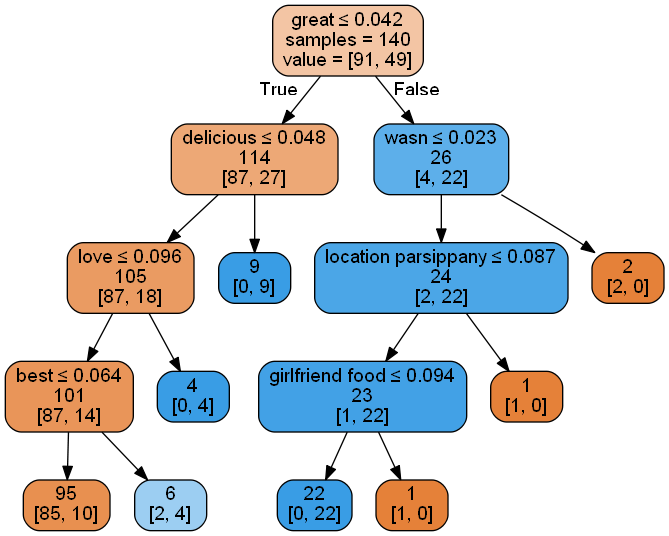

In [8]:
DecisionTree = DecisionTreeClassifier(max_depth = 4,random_state=1)
DecisionTree.fit(tfidf_train, y_train)

plotDecisionTree(DecisionTree, feature_names=tfidf_vectorizer.get_feature_names())

**a.	What is the f-measure, AUC?**    
f-measure is 0.852. AUC is 0.853

In [9]:
pred = DecisionTree.predict(tfidf_test) 

print("Accuracy on test is:",accuracy_score(y_test,pred))
print("Precision on test is:",precision_score(y_test,pred))
print("Recall on test is:",recall_score(y_test,pred))
print("F1 score on test is:",f1_score(y_test,pred))
print("AUC on test is:",roc_auc_score(y_test,pred))
print("\nConfusion Matrix:")
confusion_matrix(y_test,pred)

Accuracy on test is: 0.85
Precision on test is: 0.896551724137931
Recall on test is: 0.8125
F1 score on test is: 0.8524590163934426
AUC on test is: 0.8526785714285715

Confusion Matrix:


array([[25,  3],
       [ 6, 26]], dtype=int64)

**b.	What are the important attributes?**  
The most important features are "great","delicious","love","best","wasn","girlfriend food", etc.

In [10]:
importances = DecisionTree.feature_importances_

im = pd.DataFrame({'feature': tfidf_vectorizer.get_feature_names(), 'importance': importances})
im = im.sort_values('importance',ascending=False)
print(im.head(10))

                  feature  importance
3296                great    0.364412
1891            delicious    0.263846
4430                 love    0.132358
696                  best    0.082465
8409                 wasn    0.071921
3090      girlfriend food    0.044346
4363  location parsippany    0.040651
5865  portions reasonable    0.000000
5860             portions    0.000000
5861  portions completely    0.000000


### What are common words in bad reviews?

In [11]:
df_bad=df[df['rating']==0]
bad_count_vectorizer = CountVectorizer(ngram_range=(1, 2),stop_words = 'english')
bad_count = bad_count_vectorizer.fit_transform(df_bad["review"].values)

In [12]:
bad_count_df = pd.DataFrame(bad_count.A, columns=bad_count_vectorizer.get_feature_names())
bad_count_df.head()

,00,00 just,00 man,00 minimum,00 sick,00 understand,10,10 00,10 15,10 clock,...,yogurt shaved,york,york city,young,young lady,yuca,yuca covered,zero,zero nil,zero stars
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [13]:
bad_count_df.sum().sort_values(ascending=False).head(10)

food          128
place          86
ordered        67
like           62
time           61
restaurant     60
order          59
good           57
service        51
just           48
dtype: int64

The most common words in bad reviews are food, place, ordered, like, time, etc.

### What are common words in good reviews?

In [14]:
df_good=df[df['rating']==1]
good_count_vectorizer = CountVectorizer(ngram_range=(1, 2),stop_words = 'english')
good_count = good_count_vectorizer.fit_transform(df_good["review"].values)

In [15]:
good_count_df = pd.DataFrame(good_count.A, columns=good_count_vectorizer.get_feature_names())
good_count_df.head()

,10,10 crust,10 minutes,100,100 gluten,100 real,13,13 foil,15,15 charge,...,york far,yum,yum hope,yum short,yummmmm,yummmmm visit,zi,zi zia,zia,zia delicious
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
good_count_df.sum().sort_values(ascending=False).head(10)

great        59
food         58
good         38
place        38
delicious    32
best         23
chicken      23
menu         19
service      19
time         17
dtype: int64

The most common words in good reviews are great, food, good, place, delicious, best, chicken, etc.